In [1]:
# import dependencies
import pandas as pd
import os
import pymongo
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create server
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client["project2"]

In [3]:
# access database
for x in os.listdir("this_one"):
    df = pd.read_csv(f'this_one/{x}')
    x = x.replace(" ", "_")[:len(x)-4]
    collist = db.list_collection_names()
    records = json.loads(df.T.to_json()).values()
    if x not in collist:
        db[x].insert_many(records)

In [4]:
for x in db.list_collection_names():
    df = pd.DataFrame(list(db[x].find()))
    del df['_id']
# print(db.list_collection_names())
# data = list(db["texas_combined_completed_data"].find())
# print(json.dumps(data, default=str, indent=4))
df = pd.DataFrame(list(db["texas_combined_completed_data"].find()))
del df['_id']

In [31]:
# access tables
print(df.columns)
part_vac = []
full_vac = []
for x in range(len(df["People_Fully_Vaccinated"]) - 1):
    part_vac.append(float(df["People_Partially_Vaccinated"].tolist()[x + 1] - df["People_Partially_Vaccinated"].tolist()[x]))
    full_vac.append(df["People_Fully_Vaccinated"].tolist()[x + 1] - df["People_Fully_Vaccinated"].tolist()[x])
print(part_vac)
print(full_vac)

Index(['Last_Update', 'Province_State', 'Confirmed', 'Deaths', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'People_Fully_Vaccinated', 'People_Partially_Vaccinated'],
      dtype='object')
[36673.0, 50003.0, 40585.0, 20939.0, 18568.0, 50701.0, 11399.0, 33738.0, 32346.0, 44326.0, 14642.0, 39346.0, 0.0, 33299.0, 37259.0, 27769.0, 49837.0, 47686.0, 21308.0, 40130.0, 32536.0, 6203.0, 13189.0, -481.0, 13104.0, 0.0, 11950.0, -11879.0, 1102.0, 62843.0, -158.0, -8127.0, -1618.0, -26955.0, -17504.0, -55119.0, -8066.0, 18616.0, 14101.0, 4696.0, 22537.0, 2244.0, 31033.0, 82896.0, 68491.0, 34727.0, -22091.0, 99660.0, 87877.0, 93110.0, 113953.0, 107527.0, 73401.0, 52872.0, 61099.0, 105334.0, 116899.0, 94945.0, 90469.0, 66025.0, 21490.0, 39608.0, -20043.0, 82667.0, 72127.0, 18124.0, 23638.0, 39941.0, 17914.0, 30821.0, -8565.0, -792.0, 19096.0, 22760.0, 44297.0, -6789.0, 15085.0, -838.0, 30900.0, 22442.0, 2207.0, -776.0, 11961.0, 15667.0, -16079.0, -1019

279
[254142.0, 242198.0, 216515.0, 188630.0, 209646.0, 237853.0, 187196.0, 198136.0, 196305.0, 213198.0, 166957.0, 226856.0, 195850.0, 250457.0, 261248.0, 247035.0, 247537.0, 208738.0, 134193.0, 144811.0, 97087.0, 50168.0, 39072.0, 13315.0, 90224.0, 63858.0, 67681.0, 30284.0, 28189.0, 71324.0, -109639.0, -125516.0, -92264.0, -101882.0, -60780.0, -58354.0, 46062.0, 111843.0, 171608.0, 216593.0, 264465.0, 199544.0, 325749.0, 434456.0, 430265.0, 441963.0, 457945.0, 675188.0, 616617.0, 595072.0, 628139.0, 624659.0, 577951.0, 574490.0, 595870.0, 600496.0, 546335.0, 387439.0, 370685.0, 327899.0, 235463.0, 255729.0, 196411.0, 337078.0, 274692.0, 139997.0, 126595.0, 138356.0, 99148.0, 138438.0, 61442.0, 92865.0, 112707.0, 128175.0, 149394.0, 56218.0, 84105.0, 65058.0, 113301.0, 57864.0, 4996.0, 27016.0, 56680.0, 44623.0, -15253.0, -10321.0, -22783.0, -110994.0, -177752.0, -216326.0, -223691.0, -269015.0, -240188.0, -230218.0, -280808.0, -291341.0, -322304.0, -341884.0, -340343.0, -363675.0, -3

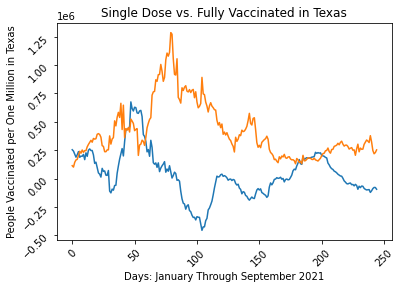

In [52]:
# show graph
print(len(df))
# plt.bar(part_vac, full_vac)
# plt.show()
pv_weekly = []
fv_weekly = []
for x in range(0, 245):
    pv = part_vac[x]
    fv = full_vac[x]
    for y in range(0, 6):
        pv += part_vac[x+y]
        fv += full_vac[x+y]
    pv_weekly.append(pv)
    fv_weekly.append(fv)
print(pv_weekly)
print(fv_weekly)
plt.plot(
    np.arange((len(pv_weekly))),
    pv_weekly
)
plt.plot(
    np.arange(len(fv_weekly)),
    fv_weekly
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Single Dose vs. Fully Vaccinated in Texas")
plt.xlabel("Days: January Through September 2021")
plt.ylabel("People Vaccinated per One Million in Texas")
plt.show()